# Introduction to CNN and Computer Vision with Tensorflow

## Get the data

2024/12/21

Food101 dataset  
Preprocessing file : https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

* zipfile 相關使用方法

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2025-01-02 15:26:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  22.3MB/s    in 5.7s    

2025-01-02 15:26:54 (18.2 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect tha data (become one with it)

A very cruciial step at the beginning of any machine learning project is becoming one with data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

* `os.walk`
* `listdir`

In [ ]:
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak")) # list in the directory

num_steak_images_train

750

To visulaize our images, first let's get the class names programmatically
* `pathlib.Path`
* `.glob("*")`

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted(item.name for item in data_dir.glob("*"))) # Created a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the trget directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

['2573392.jpg']
Image shape: (384, 512, 3)


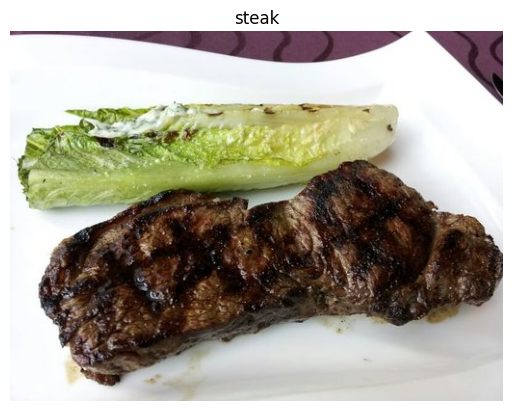

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class= "steak")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[106,  63,  91],
        [106,  63,  91],
        [106,  63,  91],
        ...,
        [102,  64,  87],
        [100,  62,  83],
        [ 96,  58,  79]],

       [[107,  67,  94],
        [107,  68,  95],
        [109,  69,  96],
        ...,
        [ 98,  60,  83],
        [100,  62,  83],
        [101,  63,  84]],

       [[ 95,  61,  85],
        [ 98,  66,  89],
        [104,  70,  94],
        ...,
        [ 97,  62,  82],
        [ 97,  62,  82],
        [ 95,  60,  80]],

       ...,

       [[244, 243, 248],
        [245, 244, 249],
        [246, 245, 250],
        ...,
        [210, 210, 210],
        [209, 209, 209],
        [209, 209, 209]],

       [[244, 243, 248],
        [244, 243, 248],
        [245, 244, 249],
        ...,
        [209, 209, 209],
        [209, 209, 209],
        [209, 209, 209]],

       [[243, 242, 247],
        [244, 243, 248],
        [245, 244, 249],
        ...,
        [209, 209, 20

In [ ]:
# View the image shape
img.shape # return widthm, height, colour channels

(384, 512, 3)

In [ ]:
# Scaling the value to become between 0 and 1
img / 255.

array([[[0.41568627, 0.24705882, 0.35686275],
        [0.41568627, 0.24705882, 0.35686275],
        [0.41568627, 0.24705882, 0.35686275],
        ...,
        [0.4       , 0.25098039, 0.34117647],
        [0.39215686, 0.24313725, 0.3254902 ],
        [0.37647059, 0.22745098, 0.30980392]],

       [[0.41960784, 0.2627451 , 0.36862745],
        [0.41960784, 0.26666667, 0.37254902],
        [0.42745098, 0.27058824, 0.37647059],
        ...,
        [0.38431373, 0.23529412, 0.3254902 ],
        [0.39215686, 0.24313725, 0.3254902 ],
        [0.39607843, 0.24705882, 0.32941176]],

       [[0.37254902, 0.23921569, 0.33333333],
        [0.38431373, 0.25882353, 0.34901961],
        [0.40784314, 0.2745098 , 0.36862745],
        ...,
        [0.38039216, 0.24313725, 0.32156863],
        [0.38039216, 0.24313725, 0.32156863],
        [0.37254902, 0.23529412, 0.31372549]],

       ...,

       [[0.95686275, 0.95294118, 0.97254902],
        [0.96078431, 0.95686275, 0.97647059],
        [0.96470588, 0

## An end-to-end example

* Load our image
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from ditectories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# compile our CNN
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history = model_1.fit(train_data,
                      epochs = 5,
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

FileNotFoundError: [Errno 2] No such file or directory: '/content/pizza_steak/train'

🔑 **Note:** Change the core into GPU  
runtime -> change runtime type

WHY? Since we do the batch!

In [ ]:
1500/32

In [ ]:
# Get model summary
model_1.summary()

**CNN explainer :** https://poloclub.github.io/cnn-explainer/

### Use the same model as before

Let's replicate the model we have built in a previous section to see if it works with our image data

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        validation_data = valid_data)

In [ ]:
# Get a summary of model_2
model_2.summary()

`model_2` has 602,141 trainable parameters where as `model_1` has only 31,101. And despite this difference, `model_1` still far and large out performs `model_2`.  

Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers?

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        validation_data=valid_data)

In [ ]:
# Get a summary of model_3
model_3.summary()

My gosh, the number of trainable parameters has increased even more than `model_2`. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, `model_3` still doesn't out perform `model_1`.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

🔑 **Note:** You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

## Binary Classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

### 1. Import and become one with the data

['2965021.jpg']
Image shape: (512, 512, 3)
['216720.jpg']
Image shape: (512, 384, 3)


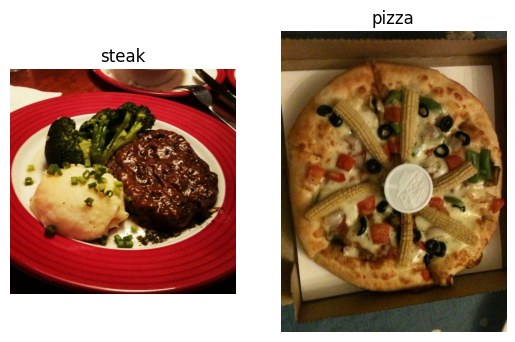

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

For an image classification project, it's standard to have your data seperated into `train` and `test` directories with subfolders in each for each class.

* `target_size` in `flow_from_directory` is (224, 224), since it only control the image size.

In [ ]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches.

Why 32?  
By Yann LeCun, a deep learning expert.
https://x.com/ylecun/status/989610208497360896?s=20

* `ImageDataGenerator(rescale = 1/255.)`

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

* `flow_from_directory`
    * `directory`
    * `target_size`: Input shape. `(height, width)`
    * `color_mode`: Default value is "rgb". However, if the image look strange, look at the color channel and change into others (ex: 'gbr')
    * `class_mode`: "categorical", "binary", "sparse", "input". Tpye of data you are working witj.
    * `batch_size`

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


> `next(train_data)`

In [ ]:
# Get a sample of the training data batch
images, labels = next(train_data) # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

`images`是第一個batch裡的32張圖片的tensor. `images[0]`是第一張圖

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.07058824, 0.03137255, 0.        ],
          [0.1137255 , 0.06666667, 0.01960784],
          [0.12156864, 0.05882353, 0.00784314],
          ...,
          [0.16470589, 0.09803922, 0.03529412],
          [0.15686275, 0.08235294, 0.02352941],
          [0.1764706 , 0.10196079, 0.04313726]],
 
         [[0.13725491, 0.07058824, 0.03137255],
          [0.14117648, 0.07058824, 0.02352941],
          [0.18823531, 0.10196079, 0.0509804 ],
          ...,
          [0.3019608 , 0.2509804 , 0.1764706 ],
          [0.24705884, 0.19607845, 0.12156864],
          [0.227451  , 0.16862746, 0.09411766]],
 
         [[0.15686275, 0.0627451 , 0.01568628],
          [0.19215688, 0.09019608, 0.03921569],
          [0.18823531, 0.07450981, 0.01960784],
          ...,
          [0.49803925, 0.47450984, 0.37254903],
          [0.49803925, 0.47450984, 0.37254903],
          [0.5372549 , 0.5137255 , 0.41176474]],
 
         ...,
 
         [[0.57254905, 0.4039216 , 0.18823531],
          [0.55686

In [ ]:
# View the first batch of labels
labels

array([0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)
2024/12/31

**Note:** In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

https://paperswithcode.com/sota

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten
from tensorflow.keras import Sequential

**Prameters:**
* `filters`
* `kernel_size`: can be 3 or (3, 3)
* `strides` can be 1 or (1, 1)
* `padding`: padding for retaining the information in the edges.
    * `same`: output shape is same as input shape, meaning there are padding at the edges.
    * `valid`: output shape gets compressed.
* `activation`
* `input_shape`: real input data size, including RGB


In [ ]:
# Create the model (this will be our baseline, a layer convolutional NN)
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = "valid",
           activation = 'relu',
           input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation ='relu'),
    Conv2D(10, 3, activation ='relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# compile the model_4
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### 4. Fit the model

In [ ]:
# Check the lengths of training and testing data genetator
len(train_data), len(test_data)

NameError: name 'train_data' is not defined

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        validation_data = test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 256ms/step - accuracy: 0.5803 - loss: 1.5841 - val_accuracy: 0.8100 - val_loss: 0.4128
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.8142 - loss: 0.4059 - val_accuracy: 0.8420 - val_loss: 0.3734
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.8803 - loss: 0.3247 - val_accuracy: 0.8520 - val_loss: 0.3707
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9513 - loss: 0.1916 - val_accuracy: 0.8220 - val_loss: 0.4065
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.9656 - loss: 0.1139 - val_accuracy: 0.8400 - val_loss: 0.3965


### 5. Evaluating our model

<Axes: >

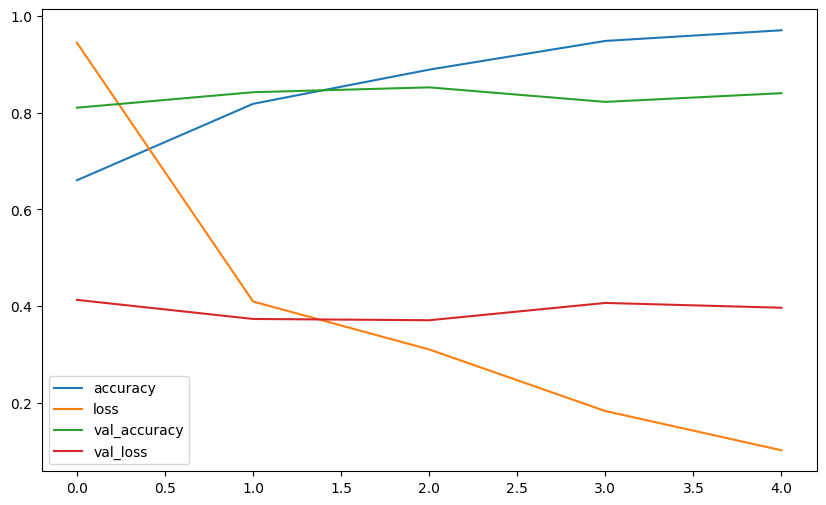

In [ ]:
import pandas as pd

# plot the training curve
pd.DataFrame(history_4.history).plot(figsize = (10, 6))

* `plot_loss_curves`
* `history.history['loss']`


In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history["loss"])) # how many epochs did we run for

    # PLot loss
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("loss")
    plt.xlabel('epochs')
    plt.legend()

    # PLot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("accuracy")
    plt.xlabel('epochs')
    plt.legend()

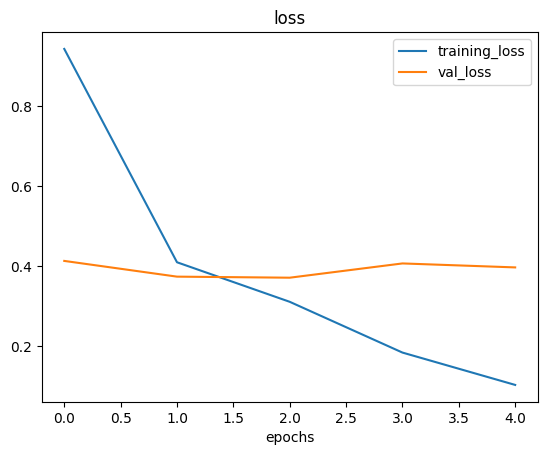

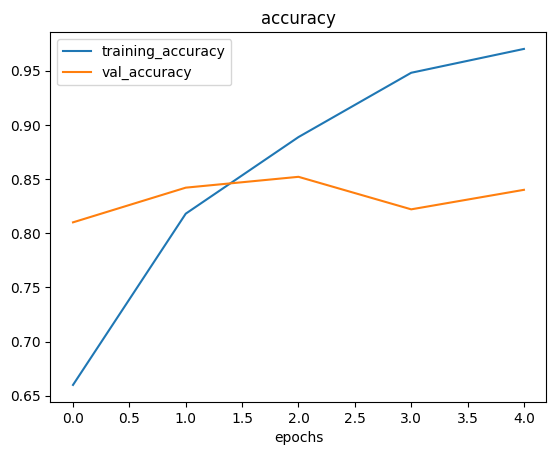

In [ ]:
plot_loss_curves(history_4)

🔑 Note: When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps: 0. Create a basline.

1. Beat the baseline by overfitting a larger model.
Reduce overfitting.
2. So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:
* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...


Max Pooling 一個合理的解釋:
如果一個filter是為了偵測這張圖是否有一些特定的feature (ex. 鳥嘴啊, 鳥尾...), max pooling則是在這2x2的結果中以最大值作為代表. 意思是如果這張圖真的這個部分有這個feature, 那其實用最大值也不會丟失這個特徵. **也可以因此而避免overfitting**

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPooling2D(pool_size= 2),
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D(pool_size= 2),
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D(pool_size= 2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ['accuracy'])

history_5 = model_5.fit(train_data,
                        epochs = 5,
                        validation_data = test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.6125 - loss: 0.6756 - val_accuracy: 0.7760 - val_loss: 0.4962
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.8006 - loss: 0.4545 - val_accuracy: 0.7880 - val_loss: 0.4316
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.8084 - loss: 0.4372 - val_accuracy: 0.8360 - val_loss: 0.3544
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.8161 - loss: 0.4025 - val_accuracy: 0.8540 - val_loss: 0.3362
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.8491 - loss: 0.3584 - val_accuracy: 0.8680 - val_loss: 0.3123


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

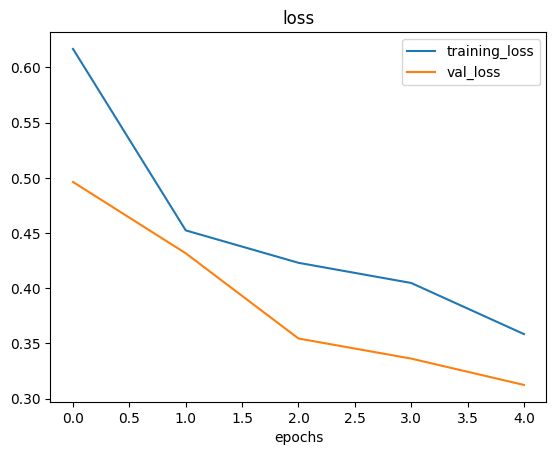

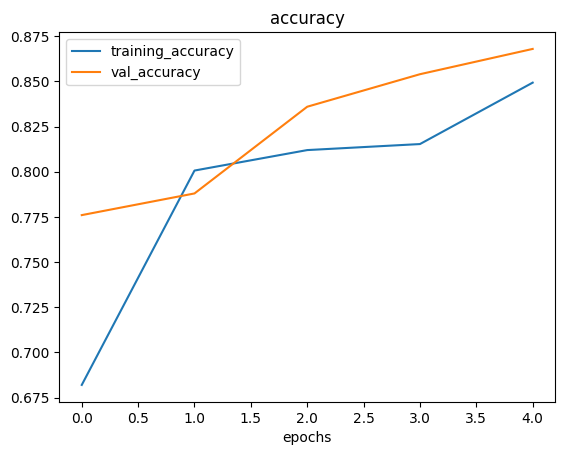

In [ ]:
plot_loss_curves(history_5)

### Data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                            rotation_range = 20,
                                            shear_range = 0.2,
                                            zoom_range = 0.2,
                                            width_shift_range = 0.2, # shift in x-axis
                                            height_shift_range=0.2, # shift in y-axis
                                            horizontal_flip = True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle = False) # for demonstration purpose only

# Create non-augmented train data batches
print("Non-augmented training images:")
train_datagen = train_datagen.flow_from_directory(train_dir,
                                                  target_size = (224, 224),
                                                  batch_size = 32,
                                                  class_mode = 'binary',
                                                  shuffle = False) # for demonstration purpose only

print("Unchanged test images:")
test_datagen = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

Finally, let's visualize some augmented data!!

In [ ]:
# Get sample augmented data batches
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented) # labels aren't augmented... only data (image)


showing image number: 30


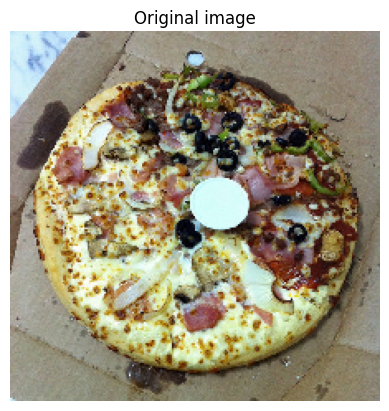

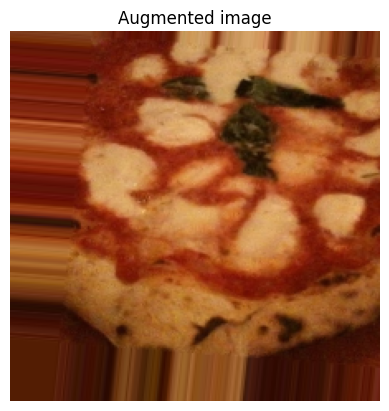

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation= 'relu', input_shape = (224, 224, 3)),
    MaxPooling2D(pool_size= 2),
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D(pool_size= 2),
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D(pool_size= 2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model_6.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

model_6.fit(train_data_augmented,
            epochs = 5,
            validation_data = test_data)

NameError: name 'test_data' is not defined

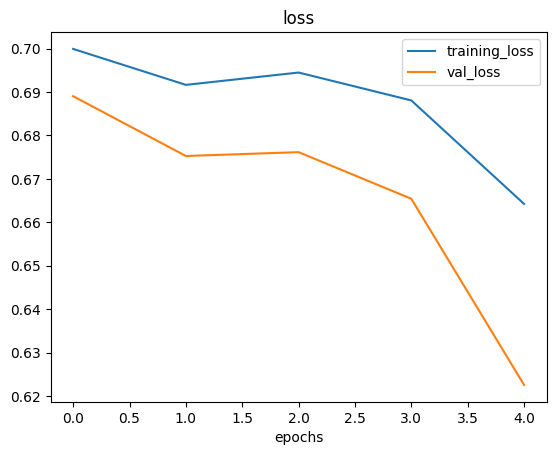

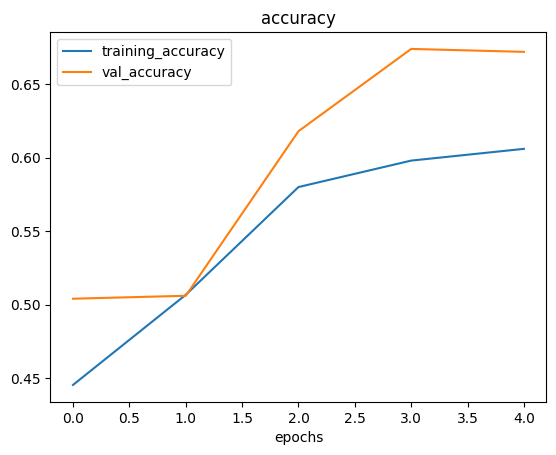

In [ ]:
# Check our models training curves
plot_loss_curves(model_6.history)

It's because when we created `train_data_augmented` we turned off data shuffling using `shuffle=False` which means our model only sees a batch of a single kind of images at a time.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle = True) # for demonstration purpose only


Augmented training data
Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5)
model_7 = Sequential([
    Conv2D(10, 3, activation= 'relu', input_shape = (224, 224, 3)),
    MaxPooling2D(pool_size= 2),
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D(pool_size= 2),
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D(pool_size= 2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model_7.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
            epochs = 5,
            validation_data = test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 439ms/step - accuracy: 0.5972 - loss: 0.6672 - val_accuracy: 0.7500 - val_loss: 0.4968
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 363ms/step - accuracy: 0.6881 - loss: 0.5790 - val_accuracy: 0.8100 - val_loss: 0.4358
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 388ms/step - accuracy: 0.7331 - loss: 0.5215 - val_accuracy: 0.8360 - val_loss: 0.4048
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 368ms/step - accuracy: 0.7479 - loss: 0.5139 - val_accuracy: 0.8060 - val_loss: 0.4201
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 364ms/step - accuracy: 0.7514 - loss: 0.5224 - val_accuracy: 0.8540 - val_loss: 0.3386


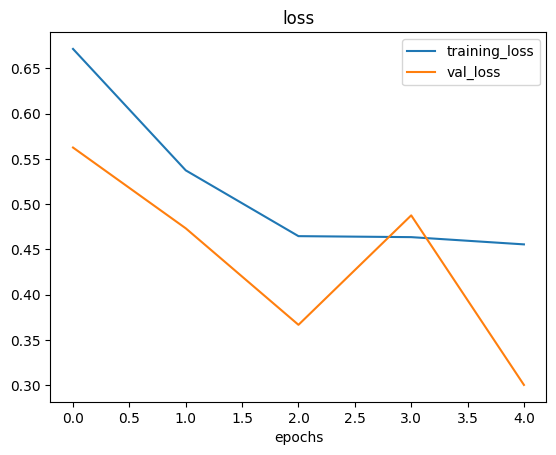

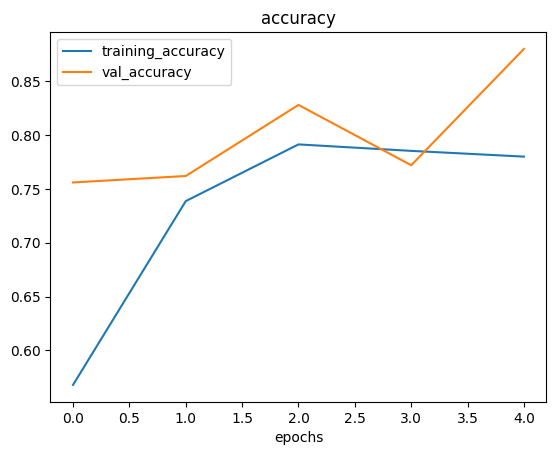

In [ ]:
plot_loss_curves(history_7)

### Repeat until satified

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

## Making a prediction with our trained model on our own custom data
2024/01/02

--2025-01-02 15:13:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2025-01-02 15:13:06 (173 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



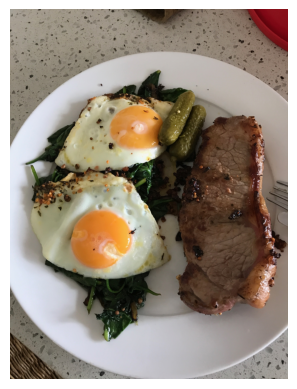

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

**Note:** For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

* `tf.io.read_file(filename)`
* `tf.image.decode_image(img)`
* `tf.image.resize(img, size = [img_shape, imgshape])`

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape = 224):
    """
    Reads an image from filename, turns it into a tensor
    and reshapes it to (img_shape, img_shape, colour_channel).
    """
    # Read in target file (an image)
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # resize the image
    img = tf.image.resize(img, size = [img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img / 255.

    return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")

In [ ]:
steak, steak.shape

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],
 
        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],
 
        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],
 
        ...,
 
        [[0.49313724, 0.42745098

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of (batch_size, 224, 224, 3).

We can fix this by adding an extra to our custom image tensor using `tf.expand_dims`.

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis = 0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.8736408]], dtype=float32)

In [ ]:
train_data_augmented_shuffled

In [ ]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_name):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis = 0))

    # Get the prediction class
    pred_class = class_names[int(tf.round(pred)[0][0])]

    # Plot the image and predictied class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


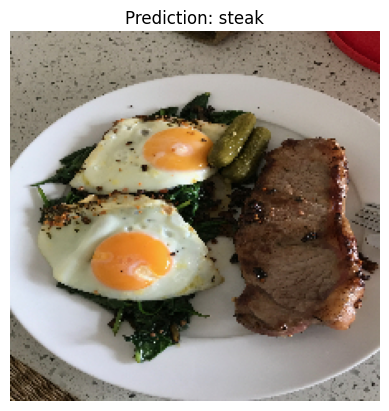

In [ ]:
pred_and_plot(model_7, "03-steak.jpeg", class_names)

--2025-01-02 15:39:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2025-01-02 15:39:46 (105 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


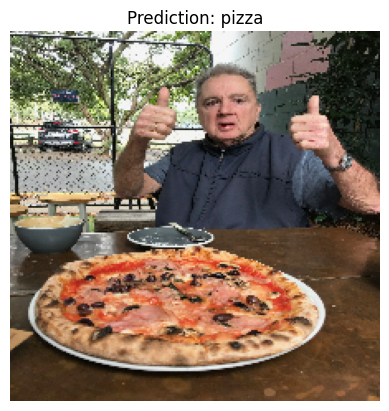

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg", class_names)

# Multi-class Image Classification

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

### 1. Import and become one with the data

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-01-02 16:56:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.251, 172.217.0.91, 172.217.7.59, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   167MB/s    in 3.0s    

2025-01-02 16:56:31 (167 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

NameError: name 'view_random_image' is not defined

### 2. Preprocess the data

* only thing to change: `class_mode`

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical'
                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical'
                                               )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

* `activation = softmax`
* `loss = 'categorical_crossentropy'`

In [ ]:
model_8 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(pool_size= 2),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(pool_size= 2),
    Flatten(),
    Dense(10, activation = 'softmax')
])

# Compile
model_8.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_8.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 283,920 (1.08 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_8 = model_8.fit(train_data,
            epochs = 5,
            validation_data = test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 142ms/step - accuracy: 0.1423 - loss: 2.2878 - val_accuracy: 0.2548 - val_loss: 2.1024
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 137ms/step - accuracy: 0.2797 - loss: 2.0362 - val_accuracy: 0.2800 - val_loss: 2.0174
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 119ms/step - accuracy: 0.3621 - loss: 1.8609 - val_accuracy: 0.3088 - val_loss: 2.0091
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 115ms/step - accuracy: 0.4886 - loss: 1.5411 - val_accuracy: 0.3008 - val_loss: 2.0629
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - accuracy: 0.6683 - loss: 1.0120 - val_accuracy: 0.2940 - val_loss: 2.5147


### 5. Evaluate the model

In [ ]:
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.3146 - loss: 2.4789


[2.5146520137786865, 0.2939999997615814]

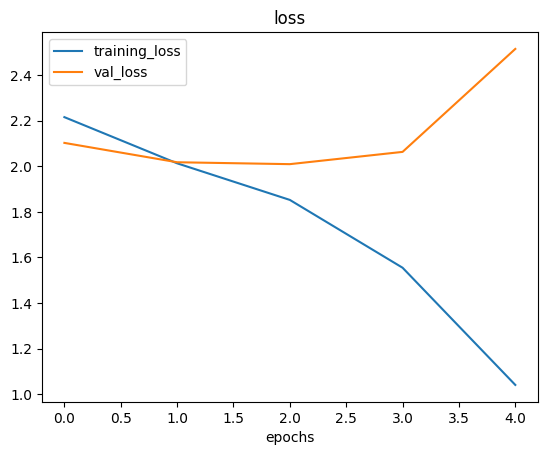

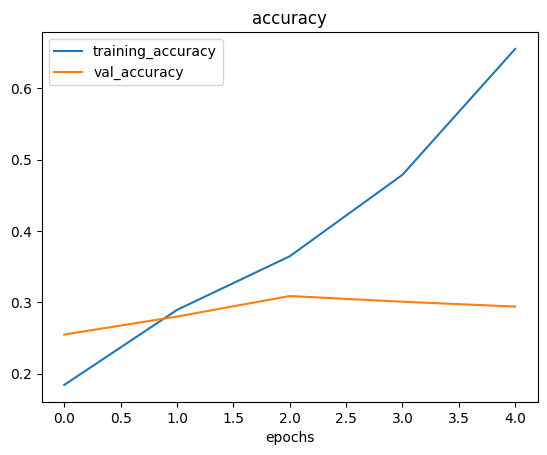

In [ ]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

Overfitting?

### 6. Adjust the model parameters

In [ ]:
# Simplify the model first?
# Let's try to remove 2 layers

model_9 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3)),
    Activation(activation='relu'),
    MaxPooling2D(pool_size= 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(pool_size= 2),
    Flatten(),
    Dense(10, activation = 'softmax')
])

# Compile
model_9.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_9 = model_9.fit(train_data,
            epochs = 5,
            validation_data = test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 124ms/step - accuracy: 0.1387 - loss: 2.4974 - val_accuracy: 0.2092 - val_loss: 2.1411
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 106ms/step - accuracy: 0.3117 - loss: 1.9928 - val_accuracy: 0.2472 - val_loss: 2.0982
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 51s 150ms/step - accuracy: 0.4449 - loss: 1.6509 - val_accuracy: 0.2628 - val_loss: 2.1167
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 109ms/step - accuracy: 0.6153 - loss: 1.2176 - val_accuracy: 0.2600 - val_loss: 2.3299
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 128ms/step - accuracy: 0.7773 - loss: 0.7521 - val_accuracy: 0.2628 - val_loss: 2.6169


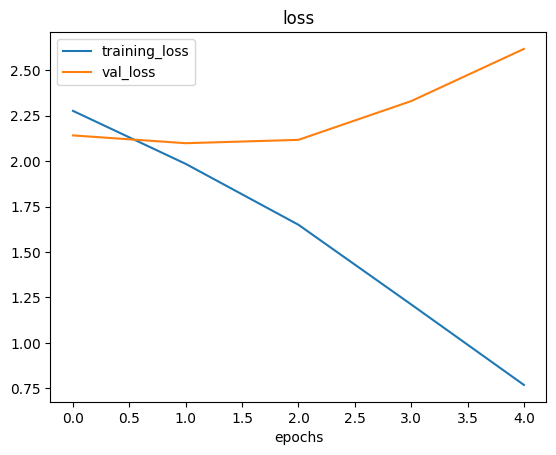

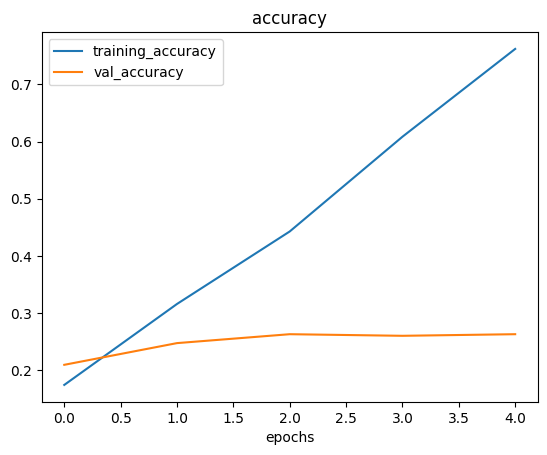

In [ ]:
# check out the loss curves of model_9
plot_loss_curves(history_9)

In [ ]:
model_8.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [ ]:
model_9.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 222, 222, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 878,402 (3.35 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 585,602 (2.23 MB)

How about using data augmentation?

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


* `tf.keras.models.clone_model(model_8)`

In [ ]:
# Simplify the model first?
# Let's try to remove 2 layers

model_10 = tf.keras.models.clone_model(model_8)

# Compile
model_10.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_10 = model_10.fit(train_data_augmented,
            epochs = 5,
            validation_data = test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


160/235 ━━━━━━━━━━━━━━━━━━━━ 3:06 2s/step - accuracy: 0.1345 - loss: 2.2911

KeyboardInterrupt: 

### 7. Repeat until satisfied

In [ ]:
# What classes has our model been trained on?
class_names

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

we need to readjust our `pred_and_plot` function to work with multiple classes as well as binary classes.

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

In [ ]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

## Saving and loading our model

In [ ]:
model_11.save("saved_trained_model")

* `tf.keras.models.load_model("saved_trained_model")`

In [ ]:
# load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

In [ ]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

**Finished!!**